In [1]:
import pandas as pd

In [2]:
#this df includes fantasty points based on PPR 2021
df = pd.read_csv('Fantasy_Football_Points_PPR_2021.csv')
df.head()

,Rank,Player,Team,Position,Points,Games,Avg
0,1.0,Cooper Kupp,LAR,WR,439.5,17.0,25.9
1,2.0,Josh Allen,BUF,QB,417.7,17.0,24.6
2,3.0,Justin Herbert,LAC,QB,395.6,17.0,23.3
3,4.0,Tom Brady,TB,QB,386.7,17.0,22.8
4,5.0,Patrick Mahomes II,KC,QB,374.2,17.0,22.0


In [3]:
df.shape

(756, 7)

In [4]:
#this df includes fantasty points ADP 2022 (June 14/22)
adp_df = pd.read_csv('FantasyPros_2022_Overall_ADP_Rankings.csv')
adp_df.head()

,Rank,Player,Team,Bye,POS,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG
0,1,Jonathan Taylor,IND,14.0,RB,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1,2,Austin Ekeler,LAC,8.0,RB,3.0,2.0,NaN,2.0,3.0,4.0,2.8
2,3,Christian McCaffrey,CAR,13.0,RB,4.0,3.0,NaN,4.0,6.0,2.0,3.8
3,4,Cooper Kupp,LAR,7.0,WR,2.0,5.0,NaN,3.0,5.0,6.0,4.2
4,5,Derrick Henry,TEN,6.0,RB,5.0,7.0,NaN,5.0,2.0,3.0,4.4


In [5]:
adp_df.shape

(349, 12)

In [6]:
# Let's add a column for ADP rank, as the AVG column only tells us their average ADP doesn't tell us much
# we're more interested in the order of the AVG column than the average itself.
adp_df['ADP RANK'] = adp_df['AVG'].rank()
adp_df.head()

,Rank,Player,Team,Bye,POS,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG,ADP RANK
0,1,Jonathan Taylor,IND,14.0,RB,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
1,2,Austin Ekeler,LAC,8.0,RB,3.0,2.0,NaN,2.0,3.0,4.0,2.8,2.0
2,3,Christian McCaffrey,CAR,13.0,RB,4.0,3.0,NaN,4.0,6.0,2.0,3.8,3.0
3,4,Cooper Kupp,LAR,7.0,WR,2.0,5.0,NaN,3.0,5.0,6.0,4.2,4.0
4,5,Derrick Henry,TEN,6.0,RB,5.0,7.0,NaN,5.0,2.0,3.0,4.4,5.0


In [7]:
#A common way to select the VOR threshold is to take the top 100 players and then take the lowest performing player to compare it to
adp_df_cutoff = adp_df[:100]

In [8]:
adp_df_cutoff.tail()

,Rank,Player,Team,Bye,POS,ESPN,RTSports,MFL,Fantrax,FFC,Sleeper,AVG,ADP RANK
95,96,Ken Walker III,SEA,11.0,RB,109.0,65.0,NaN,99.0,138.0,67.0,95.6,96.0
96,97,Drake London,ATL,14.0,WR,78.0,94.0,NaN,105.0,135.0,76.0,97.6,97.0
97,98,Robert Woods,TEN,6.0,WR,129.0,103.0,NaN,98.0,65.0,100.0,99.0,98.0
98,99,Melvin Gordon III,DEN,9.0,RB,118.0,85.0,NaN,106.0,89.0,107.0,101.0,99.0
99,100,Dawson Knox,BUF,7.0,TE,122.0,101.0,NaN,111.0,86.0,86.0,101.2,100.0


In [9]:
# this is where we are going to save our replacement players

replacement_players = {
    'RB': '',
    'QB': '',
    'WR': '',
    'TE': ''
}

#The iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame.
#Each iteration produces an index object and a row object (a Pandas Series object).
for index, row in adp_df_cutoff.iterrows(): 
    
    position = row['POS'] # extract out the position and player value from each row as we loop through it
    player = row['Player']
    
    if position in replacement_players: # if the position is in the dict's keys, gets rid of positions we don't care about
        replacement_players[position] = player # set that player as the replacement player

In [10]:
replacement_players

{'RB': 'Melvin Gordon III',
 'QB': 'Tom Brady',
 'WR': 'Robert Woods',
 'TE': 'Dawson Knox'}

In [11]:
df.head()

,Rank,Player,Team,Position,Points,Games,Avg
0,1.0,Cooper Kupp,LAR,WR,439.5,17.0,25.9
1,2.0,Josh Allen,BUF,QB,417.7,17.0,24.6
2,3.0,Justin Herbert,LAC,QB,395.6,17.0,23.3
3,4.0,Tom Brady,TB,QB,386.7,17.0,22.8
4,5.0,Patrick Mahomes II,KC,QB,374.2,17.0,22.0


In [12]:
#method to find the values of the players

replacement_values = {} # initialize an empty dictionary

for position, player_name in replacement_players.items():
    
    player = df.loc[df['Player'] == player_name]
    
    # because this is a series object we get back, we need to use the tolist method
    # to get back the series as a list. The list object is of length 1, and the 1 item has the value we need.
    # we tack on a [0] to get the value we need.
    
    replacement_values[position] = player['Points'].tolist()[0]

In [13]:
replacement_values

{'RB': 195.2, 'QB': 386.7, 'WR': 137.2, 'TE': 164.1}

In [14]:
df = df.loc[df['Position'].isin(['QB', 'RB', 'WR', 'TE'])]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df['VOR'] = df.apply(
    lambda row: row['Points'] - replacement_values.get(row['Position']), axis=1
)

In [15]:
df.head()

,Rank,Player,Team,Position,Points,Games,Avg,VOR
0,1.0,Cooper Kupp,LAR,WR,439.5,17.0,25.9,302.3
1,2.0,Josh Allen,BUF,QB,417.7,17.0,24.6,31.0
2,3.0,Justin Herbert,LAC,QB,395.6,17.0,23.3,8.9
3,4.0,Tom Brady,TB,QB,386.7,17.0,22.8,0.0
4,5.0,Patrick Mahomes II,KC,QB,374.2,17.0,22.0,-12.5


In [16]:
df = df[:150]

In [17]:
df.shape

(150, 8)

In [18]:
pd.set_option('display.max_rows', None)
df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR', ascending=False).head(10)

,Rank,Player,Team,Position,Points,Games,Avg,VOR,VOR Rank
0,1.0,Cooper Kupp,LAR,WR,439.5,17.0,25.9,302.3,1.0
7,8.0,Davante Adams,GB,WR,344.3,16.0,21.5,207.1,2.0
9,10.0,Deebo Samuel,SF,WR,339.0,16.0,21.2,201.8,3.0
11,12.0,Justin Jefferson,MIN,WR,330.4,17.0,19.4,193.2,4.0
5,6.0,Jonathan Taylor,IND,RB,373.1,17.0,22.0,177.9,5.0
17,18.0,Ja'Marr Chase,CIN,WR,304.6,17.0,17.9,167.4,6.0
20,21.0,Tyreek Hill,KC,WR,296.5,17.0,17.4,159.3,7.0
8,9.0,Austin Ekeler,LAC,RB,343.8,16.0,21.5,148.6,8.0
22,23.0,Stefon Diggs,BUF,WR,285.5,17.0,16.8,148.3,9.0
24,25.0,Diontae Johnson,PIT,WR,274.4,16.0,17.2,137.2,10.0


In [19]:
#if you want to normalize the value between 0 and 1
df['VORNorm'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

In [20]:
df = df.sort_values(by='VOR Rank')
df.head(10)

,Rank,Player,Team,Position,Points,Games,Avg,VOR,VOR Rank,VORNorm
0,1.0,Cooper Kupp,LAR,WR,439.5,17.0,25.9,302.3,1.0,1.000000
7,8.0,Davante Adams,GB,WR,344.3,16.0,21.5,207.1,2.0,0.830665
9,10.0,Deebo Samuel,SF,WR,339.0,16.0,21.2,201.8,3.0,0.821238
11,12.0,Justin Jefferson,MIN,WR,330.4,17.0,19.4,193.2,4.0,0.805941
5,6.0,Jonathan Taylor,IND,RB,373.1,17.0,22.0,177.9,5.0,0.778726
17,18.0,Ja'Marr Chase,CIN,WR,304.6,17.0,17.9,167.4,6.0,0.760050
20,21.0,Tyreek Hill,KC,WR,296.5,17.0,17.4,159.3,7.0,0.745642
8,9.0,Austin Ekeler,LAC,RB,343.8,16.0,21.5,148.6,8.0,0.726610
22,23.0,Stefon Diggs,BUF,WR,285.5,17.0,16.8,148.3,9.0,0.726076
24,25.0,Diontae Johnson,PIT,WR,274.4,16.0,17.2,137.2,10.0,0.706332


[Text(0.5, 1.0, 'Value Over Replacement (VOR) Normalized By Position')]

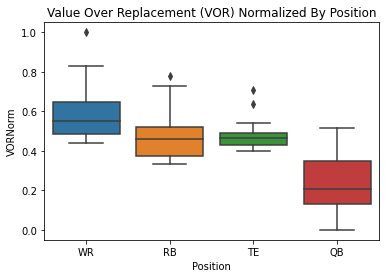

In [21]:
#visualize our results
import seaborn as sns
# calculating how many players are in our draft pool.
num_teams = 10
num_spots = 15 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 6 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Position'], y=df_copy['VORNorm']).set(title='Value Over Replacement (VOR) Normalized By Position')

In [22]:
adp_df = adp_df[['Player', 'POS', 'Team', 'AVG', 'ADP RANK']] # filtering out the columns we need.)

In [23]:
adp_df.head(10)

,Player,POS,Team,AVG,ADP RANK
0,Jonathan Taylor,RB,IND,1.0,1.0
1,Austin Ekeler,RB,LAC,2.8,2.0
2,Christian McCaffrey,RB,CAR,3.8,3.0
3,Cooper Kupp,WR,LAR,4.2,4.0
4,Derrick Henry,RB,TEN,4.4,5.0
5,Najee Harris,RB,PIT,6.2,6.0
6,Justin Jefferson,WR,MIN,6.6,7.0
7,Dalvin Cook,RB,MIN,7.6,8.0
8,Ja'Marr Chase,WR,CIN,9.4,9.0
9,Davante Adams,WR,LV,10.2,10.0


In [24]:
df = df[['Player', 'Position', 'Team', 'Points', 'VOR', 'VOR Rank', 'VORNorm']] # filtering out the columns we need.

In [25]:
df.head()

,Player,Position,Team,Points,VOR,VOR Rank,VORNorm
0,Cooper Kupp,WR,LAR,439.5,302.3,1.0,1.000000
7,Davante Adams,WR,GB,344.3,207.1,2.0,0.830665
9,Deebo Samuel,WR,SF,339.0,201.8,3.0,0.821238
11,Justin Jefferson,WR,MIN,330.4,193.2,4.0,0.805941
5,Jonathan Taylor,RB,IND,373.1,177.9,5.0,0.778726


In [26]:
df = df.rename({'Position': 'POS'}, axis=1) # axis = 1 means make the change along the column axis.

In [27]:
df.head()

,Player,POS,Team,Points,VOR,VOR Rank,VORNorm
0,Cooper Kupp,WR,LAR,439.5,302.3,1.0,1.000000
7,Davante Adams,WR,GB,344.3,207.1,2.0,0.830665
9,Deebo Samuel,WR,SF,339.0,201.8,3.0,0.821238
11,Justin Jefferson,WR,MIN,330.4,193.2,4.0,0.805941
5,Jonathan Taylor,RB,IND,373.1,177.9,5.0,0.778726


In [28]:
final_df = df.merge(adp_df, how='left', on=['Player', 'POS'])
final_df.head()

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK
0,Cooper Kupp,WR,LAR,439.5,302.3,1.0,1.000000,LAR,4.2,4.0
1,Davante Adams,WR,GB,344.3,207.1,2.0,0.830665,LV,10.2,10.0
2,Deebo Samuel,WR,SF,339.0,201.8,3.0,0.821238,SF,15.4,16.0
3,Justin Jefferson,WR,MIN,330.4,193.2,4.0,0.805941,MIN,6.6,7.0
4,Jonathan Taylor,RB,IND,373.1,177.9,5.0,0.778726,IND,1.0,1.0


In [29]:
final_df.shape

(150, 10)

In [30]:
# let's calculate the difference between our value rank and adp rank
final_df['Diff in ADP and Value'] = final_df['ADP RANK'] - final_df['VOR Rank']
final_df.head()

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
0,Cooper Kupp,WR,LAR,439.5,302.3,1.0,1.000000,LAR,4.2,4.0,3.0
1,Davante Adams,WR,GB,344.3,207.1,2.0,0.830665,LV,10.2,10.0,8.0
2,Deebo Samuel,WR,SF,339.0,201.8,3.0,0.821238,SF,15.4,16.0,13.0
3,Justin Jefferson,WR,MIN,330.4,193.2,4.0,0.805941,MIN,6.6,7.0,3.0
4,Jonathan Taylor,RB,IND,373.1,177.9,5.0,0.778726,IND,1.0,1.0,-4.0


In [31]:
#lets calculate the top sleepers available in the draft
draft_pool = final_df.sort_values(by='ADP RANK')[:150] #10 teams x 15 positions

rb_draft_pool = draft_pool.loc[draft_pool['POS'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['POS'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['POS'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['POS'] == 'TE']

In [46]:
clean_list = draft_pool[['Player','POS','Team_y','AVG','Diff in ADP and Value']]

In [47]:
clean_list = clean_list.rename({'Team_y': 'Team', 'AVG':'Average Draft Pick'}, axis=1) # axis = 1 means make the change along the column axis.

In [49]:
#cleaned up the list to make it more readable and presentable
clean_list.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,POS,Team,Average Draft Pick,Diff in ADP and Value
37,Jakobi Meyers,WR,NE,138.2,90.5
39,Tyler Boyd,WR,CIN,133.2,85.0
31,Christian Kirk,WR,JAC,113.0,78.0
54,Russell Gage,WR,TB,124.2,64.5
12,Hunter Renfrow,WR,LV,77.4,63.0
72,Allen Lazard,WR,GB,139.2,59.0
19,Tyler Lockett,WR,SEA,75.2,53.0
71,Rob Gronkowski,TE,NaN,127.3,49.0
53,Chase Claypool,WR,PIT,102.0,47.0
89,Noah Fant,TE,SEA,140.2,44.0


In [50]:
clean_list.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,POS,Team,Average Draft Pick,Diff in ADP and Value
123,Christian McCaffrey,RB,CAR,3.8,-121.0
111,Saquon Barkley,RB,NYG,27.6,-86.0
86,Derrick Henry,RB,TEN,4.4,-82.0
132,Lamar Jackson,QB,BAL,52.4,-81.0
127,Kyler Murray,QB,ARI,59.4,-74.0
97,Patrick Mahomes II,QB,KC,33.2,-67.0
104,Darren Waller,TE,LV,42.8,-61.0
120,Joe Burrow,QB,CIN,63.6,-61.0
66,Dalvin Cook,RB,MIN,7.6,-59.0
103,Elijah Mitchell,RB,SF,48.4,-57.0


In [41]:
draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:20]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
37,Jakobi Meyers,WR,NE,186.3,49.1,38.0,0.549626,NE,138.2,128.5,90.5
39,Tyler Boyd,WR,CIN,183.8,46.6,40.0,0.545180,CIN,133.2,125.0,85.0
31,Christian Kirk,WR,ARI,207.6,70.4,32.0,0.587513,JAC,113.0,110.0,78.0
54,Russell Gage,WR,ATL,163.0,25.8,55.0,0.508182,TB,124.2,119.5,64.5
12,Hunter Renfrow,WR,LV,259.1,121.9,13.0,0.679118,LV,77.4,76.0,63.0
72,Allen Lazard,WR,GB,142.5,5.3,73.0,0.471718,GB,139.2,132.0,59.0
19,Tyler Lockett,WR,SEA,241.4,104.2,20.0,0.647634,SEA,75.2,73.0,53.0
71,Rob Gronkowski,TE,TB,171.2,7.1,72.0,0.474920,NaN,127.3,121.0,49.0
53,Chase Claypool,WR,PIT,166.6,29.4,54.0,0.514586,PIT,102.0,101.0,47.0
89,Noah Fant,TE,DEN,159.0,-5.1,90.0,0.453219,SEA,140.2,134.0,44.0


In [42]:
draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:20]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
123,Christian McCaffrey,RB,CAR,127.5,-67.7,124.0,0.341871,CAR,3.8,3.0,-121.0
111,Saquon Barkley,RB,NYG,148.6,-46.6,112.0,0.379402,NYG,27.6,26.0,-86.0
86,Derrick Henry,RB,TEN,193.3,-1.9,87.0,0.458911,TEN,4.4,5.0,-82.0
132,Lamar Jackson,QB,BAL,253.0,-133.7,133.0,0.224475,BAL,52.4,52.0,-81.0
127,Kyler Murray,QB,ARI,310.5,-76.2,128.0,0.326752,ARI,59.4,54.0,-74.0
97,Patrick Mahomes II,QB,KC,374.2,-12.5,98.0,0.440057,KC,33.2,31.0,-67.0
104,Darren Waller,TE,LV,133.5,-30.6,105.0,0.407862,LV,42.8,44.0,-61.0
120,Joe Burrow,QB,CIN,328.1,-58.6,121.0,0.358058,CIN,63.6,60.0,-61.0
66,Dalvin Cook,RB,MIN,206.3,11.1,67.0,0.482035,MIN,7.6,8.0,-59.0
103,Elijah Mitchell,RB,SF,165.0,-30.2,104.0,0.408573,SF,48.4,47.0,-57.0


In [32]:
# top 10 RB sleepers for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
45,Cordarrelle Patterson,RB,ATL,234.6,39.4,46.0,0.532373,ATL,79.8,81.0,35.0
126,Kenneth Gainwell,RB,PHI,123.4,-71.8,127.0,0.334578,PHI,159.0,149.0,22.0
106,Darrell Henderson Jr.,RB,LAR,163.4,-31.8,107.0,0.405727,LAR,131.4,123.0,16.0
82,Melvin Gordon III,RB,DEN,195.2,0.0,84.5,0.462291,DEN,101.0,99.0,14.5
122,J.D. McKissic,RB,WAS,127.9,-67.3,123.0,0.342583,WAS,142.0,137.0,14.0
100,James Robinson,RB,JAC,173.9,-21.3,101.0,0.424404,JAC,108.6,106.0,5.0
74,Devin Singletary,RB,BUF,197.8,2.6,75.0,0.466916,BUF,79.2,78.5,3.5
34,James Conner,RB,ARI,257.7,62.5,35.0,0.573461,ARI,36.0,36.0,1.0
61,Damien Harris,RB,NE,210.1,14.9,62.0,0.488794,NE,65.4,63.0,1.0
4,Jonathan Taylor,RB,IND,373.1,177.9,5.0,0.778726,IND,1.0,1.0,-4.0


In [33]:
# top 10 RB overvalued for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
123,Christian McCaffrey,RB,CAR,127.5,-67.7,124.0,0.341871,CAR,3.8,3.0,-121.0
111,Saquon Barkley,RB,NYG,148.6,-46.6,112.0,0.379402,NYG,27.6,26.0,-86.0
86,Derrick Henry,RB,TEN,193.3,-1.9,87.0,0.458911,TEN,4.4,5.0,-82.0
66,Dalvin Cook,RB,MIN,206.3,11.1,67.0,0.482035,MIN,7.6,8.0,-59.0
103,Elijah Mitchell,RB,SF,165.0,-30.2,104.0,0.408573,SF,48.4,47.0,-57.0
69,Javonte Williams,RB,DEN,204.9,9.7,70.0,0.479545,DEN,17.0,17.0,-53.0
79,David Montgomery,RB,CHI,196.0,0.8,80.5,0.463714,CHI,31.2,29.0,-51.5
63,D'Andre Swift,RB,DET,208.9,13.7,64.0,0.486660,DET,15.2,14.0,-50.0
57,Nick Chubb,RB,CLE,215.3,20.1,58.0,0.498043,CLE,18.2,19.0,-39.0
92,AJ Dillon,RB,GB,185.6,-9.6,93.0,0.445215,GB,65.2,62.0,-31.0


In [34]:
# top 10 WR sleepers for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
37,Jakobi Meyers,WR,NE,186.3,49.1,38.0,0.549626,NE,138.2,128.5,90.5
39,Tyler Boyd,WR,CIN,183.8,46.6,40.0,0.545180,CIN,133.2,125.0,85.0
31,Christian Kirk,WR,ARI,207.6,70.4,32.0,0.587513,JAC,113.0,110.0,78.0
54,Russell Gage,WR,ATL,163.0,25.8,55.0,0.508182,TB,124.2,119.5,64.5
12,Hunter Renfrow,WR,LV,259.1,121.9,13.0,0.679118,LV,77.4,76.0,63.0
72,Allen Lazard,WR,GB,142.5,5.3,73.0,0.471718,GB,139.2,132.0,59.0
19,Tyler Lockett,WR,SEA,241.4,104.2,20.0,0.647634,SEA,75.2,73.0,53.0
53,Chase Claypool,WR,PIT,166.6,29.4,54.0,0.514586,PIT,102.0,101.0,47.0
38,DeVonta Smith,WR,PHI,185.6,48.4,39.0,0.548381,PHI,80.6,82.5,43.5
87,Jarvis Landry,WR,CLE,133.0,-4.2,88.0,0.454820,NO,139.0,131.0,43.0


In [35]:
# top 10 WR overvalued for this year's draft
wr_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
41,A.J. Brown,WR,TEN,180.9,43.7,42.0,0.540021,PHI,27.0,25.0,-17.0
95,Gabriel Davis,WR,BUF,125.9,-11.3,96.0,0.442191,BUF,83.2,84.0,-12.0
23,CeeDee Lamb,WR,DAL,232.8,95.6,24.0,0.632337,DAL,20.4,20.0,-4.0
76,Elijah Moore,WR,NYJ,138.2,1.0,77.0,0.464070,NYJ,77.0,75.0,-2.0
64,Courtland Sutton,WR,DEN,150.2,13.0,65.0,0.485414,DEN,70.0,67.0,2.0
8,Stefon Diggs,WR,BUF,285.5,148.3,9.0,0.726076,BUF,13.6,11.0,2.0
0,Cooper Kupp,WR,LAR,439.5,302.3,1.0,1.000000,LAR,4.2,4.0,3.0
3,Justin Jefferson,WR,MIN,330.4,193.2,4.0,0.805941,MIN,6.6,7.0,3.0
5,Ja'Marr Chase,WR,CIN,304.6,167.4,6.0,0.760050,CIN,9.4,9.0,3.0
29,Tee Higgins,WR,CIN,219.1,81.9,30.0,0.607969,CIN,34.8,34.5,4.5


In [36]:
# top 10 TE sleepers for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
71,Rob Gronkowski,TE,TB,171.2,7.1,72.0,0.474920,NaN,127.3,121.0,49.0
89,Noah Fant,TE,DEN,159.0,-5.1,90.0,0.453219,SEA,140.2,134.0,44.0
60,Zach Ertz,TE,Multi,180.7,16.6,61.0,0.491818,ARI,103.8,102.0,41.0
81,Hunter Henry,TE,NE,164.3,0.2,82.0,0.462647,NE,123.4,117.5,35.5
77,Mike Gesicki,TE,MIA,165.0,0.9,78.5,0.463892,MIA,109.6,107.0,28.5
40,Dalton Schultz,TE,DAL,208.8,44.7,41.0,0.541800,DAL,72.4,69.0,28.0
85,Dawson Knox,TE,BUF,164.1,0.0,84.5,0.462291,BUF,101.2,100.0,15.5
10,Mark Andrews,TE,BAL,301.1,137.0,11.0,0.705977,BAL,20.8,21.0,10.0
96,Pat Freiermuth,TE,PIT,151.7,-12.4,97.0,0.440235,PIT,104.0,103.0,6.0
78,Dallas Goedert,TE,PHI,165.0,0.9,78.5,0.463892,PHI,79.6,80.0,1.5


In [37]:
# top 10 TE overvalued for this year's draft
te_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
104,Darren Waller,TE,LV,133.5,-30.6,105.0,0.407862,LV,42.8,44.0,-61.0
99,T.J. Hockenson,TE,DET,145.3,-18.8,100.0,0.428851,DET,64.6,61.0,-39.0
65,Kyle Pitts,TE,ATL,176.6,12.5,66.0,0.484525,ATL,34.2,33.0,-33.0
22,Travis Kelce,TE,KC,262.8,98.7,23.0,0.637851,KC,15.2,14.0,-9.0
47,George Kittle,TE,SF,198.0,33.9,47.5,0.522590,SF,40.4,41.5,-6.0
78,Dallas Goedert,TE,PHI,165.0,0.9,78.5,0.463892,PHI,79.6,80.0,1.5
96,Pat Freiermuth,TE,PIT,151.7,-12.4,97.0,0.440235,PIT,104.0,103.0,6.0
10,Mark Andrews,TE,BAL,301.1,137.0,11.0,0.705977,BAL,20.8,21.0,10.0
85,Dawson Knox,TE,BUF,164.1,0.0,84.5,0.462291,BUF,101.2,100.0,15.5
40,Dalton Schultz,TE,DAL,208.8,44.7,41.0,0.541800,DAL,72.4,69.0,28.0


In [38]:
# top 10 QB sleepers for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
129,Ryan Tannehill,QB,TEN,282.3,-104.4,130.0,0.276592,TEN,165.6,159.5,29.5
137,Matt Ryan,QB,ATL,234.8,-151.9,138.0,0.192102,IND,160.8,151.5,13.5
135,Mac Jones,QB,NE,238.0,-148.7,136.0,0.197794,NE,157.6,148.0,12.0
84,Tom Brady,QB,TB,386.7,0.0,84.5,0.462291,TB,94.0,90.5,6.0
139,Trevor Lawrence,QB,JAC,216.0,-170.7,140.0,0.158662,JAC,145.4,140.0,0.0
128,Kirk Cousins,QB,MIN,307.3,-79.4,129.0,0.321060,MIN,119.2,116.0,-13.0
143,Tua Tagovailoa,QB,MIA,190.9,-195.8,144.0,0.114016,MIA,134.2,126.0,-18.0
130,Derek Carr,QB,LV,270.6,-116.1,131.0,0.255781,LV,115.2,112.5,-18.5
109,Matthew Stafford,QB,LAR,346.8,-39.9,110.0,0.391320,LAR,88.4,89.0,-21.0
148,Justin Fields,QB,CHI,136.9,-249.8,149.0,0.017965,CHI,136.6,127.0,-22.0


In [39]:
# top 10 QB overvalued for this year's draft
qb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,POS,Team_x,Points,VOR,VOR Rank,VORNorm,Team_y,AVG,ADP RANK,Diff in ADP and Value
132,Lamar Jackson,QB,BAL,253.0,-133.7,133.0,0.224475,BAL,52.4,52.0,-81.0
127,Kyler Murray,QB,ARI,310.5,-76.2,128.0,0.326752,ARI,59.4,54.0,-74.0
97,Patrick Mahomes II,QB,KC,374.2,-12.5,98.0,0.440057,KC,33.2,31.0,-67.0
120,Joe Burrow,QB,CIN,328.1,-58.6,121.0,0.358058,CIN,63.6,60.0,-61.0
121,Jalen Hurts,QB,PHI,321.2,-65.5,122.0,0.345784,PHI,73.4,70.0,-52.0
133,Russell Wilson,QB,SEA,248.7,-138.0,134.0,0.216827,DEN,84.6,85.0,-49.0
117,Dak Prescott,QB,DAL,330.4,-56.3,118.0,0.362149,DAL,74.2,72.0,-46.0
114,Aaron Rodgers,QB,GB,337.3,-49.4,115.0,0.374422,GB,78.8,77.0,-38.0
70,Justin Herbert,QB,LAC,395.6,8.9,71.0,0.478122,LAC,38.6,39.0,-32.0
50,Josh Allen,QB,BUF,417.7,31.0,51.5,0.517432,BUF,23.0,22.0,-29.5
